<a href="https://colab.research.google.com/github/CNU-Jiho-Jeong/Data-analysis-lecture/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

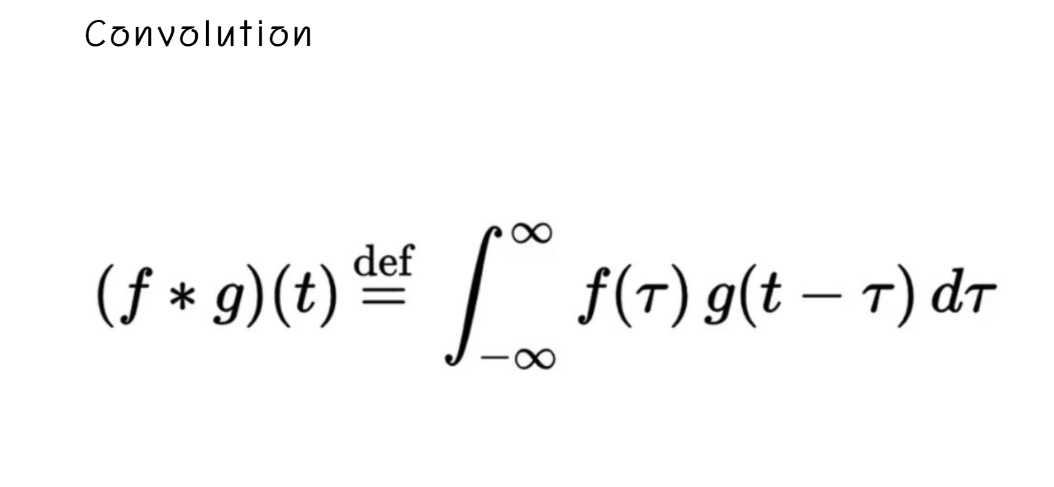

## 합성곱 신경망(Convolution neural network)

1. 일반적인 DNN(Deep Neural Network, 심층신경망)은 데이터를 1차원 데이터로 변환한 데이터를 입력받는다. 여기서 공간적/지역적 정보가 손실된다.


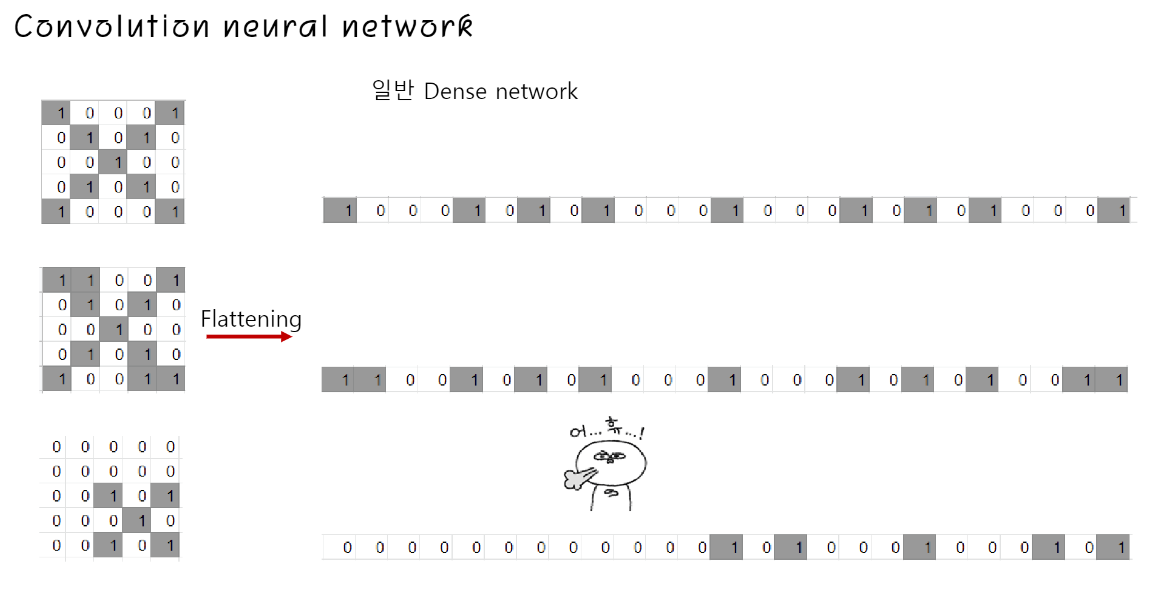

2. 이를 해결하기 위해 CNN 방법이 고안되었다.
- **이미지를 그대로 받음**으로써 공간적/지역적 정보를 유지
- 이 과정에서 **이미지의 부분적인 특성들의 정보가 유지**된다.
- 즉, 이미지 **전체보다는 부분**을 보며, **한 픽셀과 주변 픽셀간의 연관성을 살리는 것이 중요 포인트**

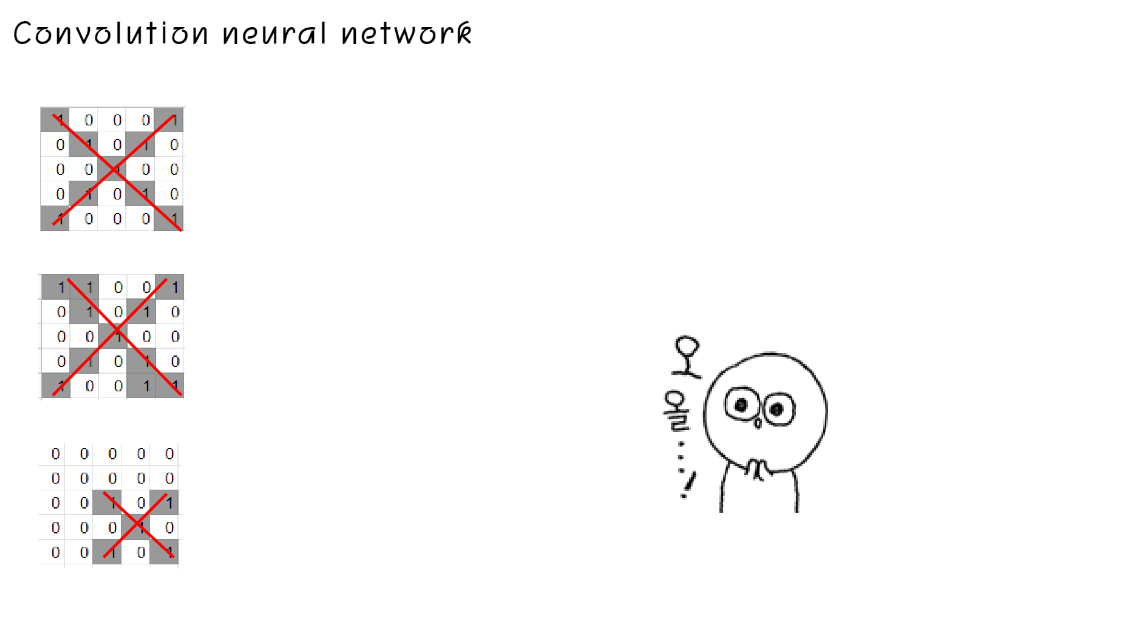

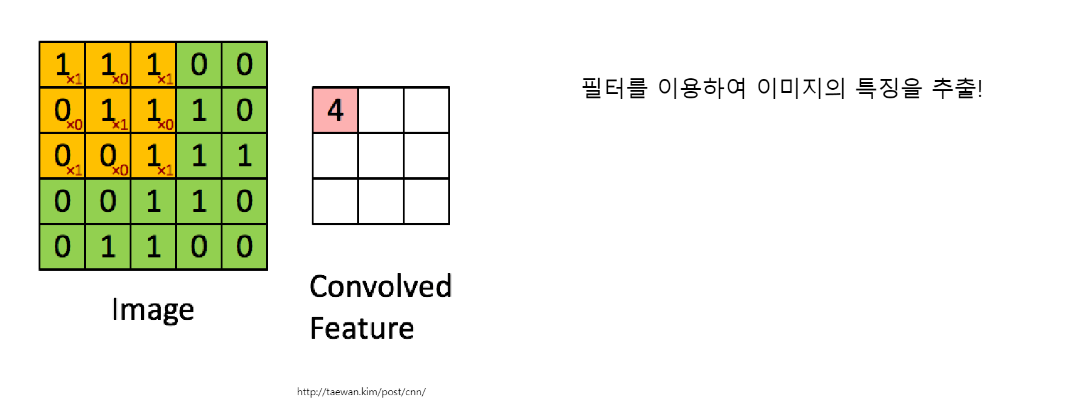

## 3. HOW?

1) 합성곱 연산

2) 패딩: 얼만큼씩 훑고 지나갈거냐에 따라 padding size도 맞춰서 조절

3) 풀링: 데이터의 공간적 특성을 유지하며 크기를 줄여줌

4) 플래트닝(Flattening)


## 4. DNN vs CNN

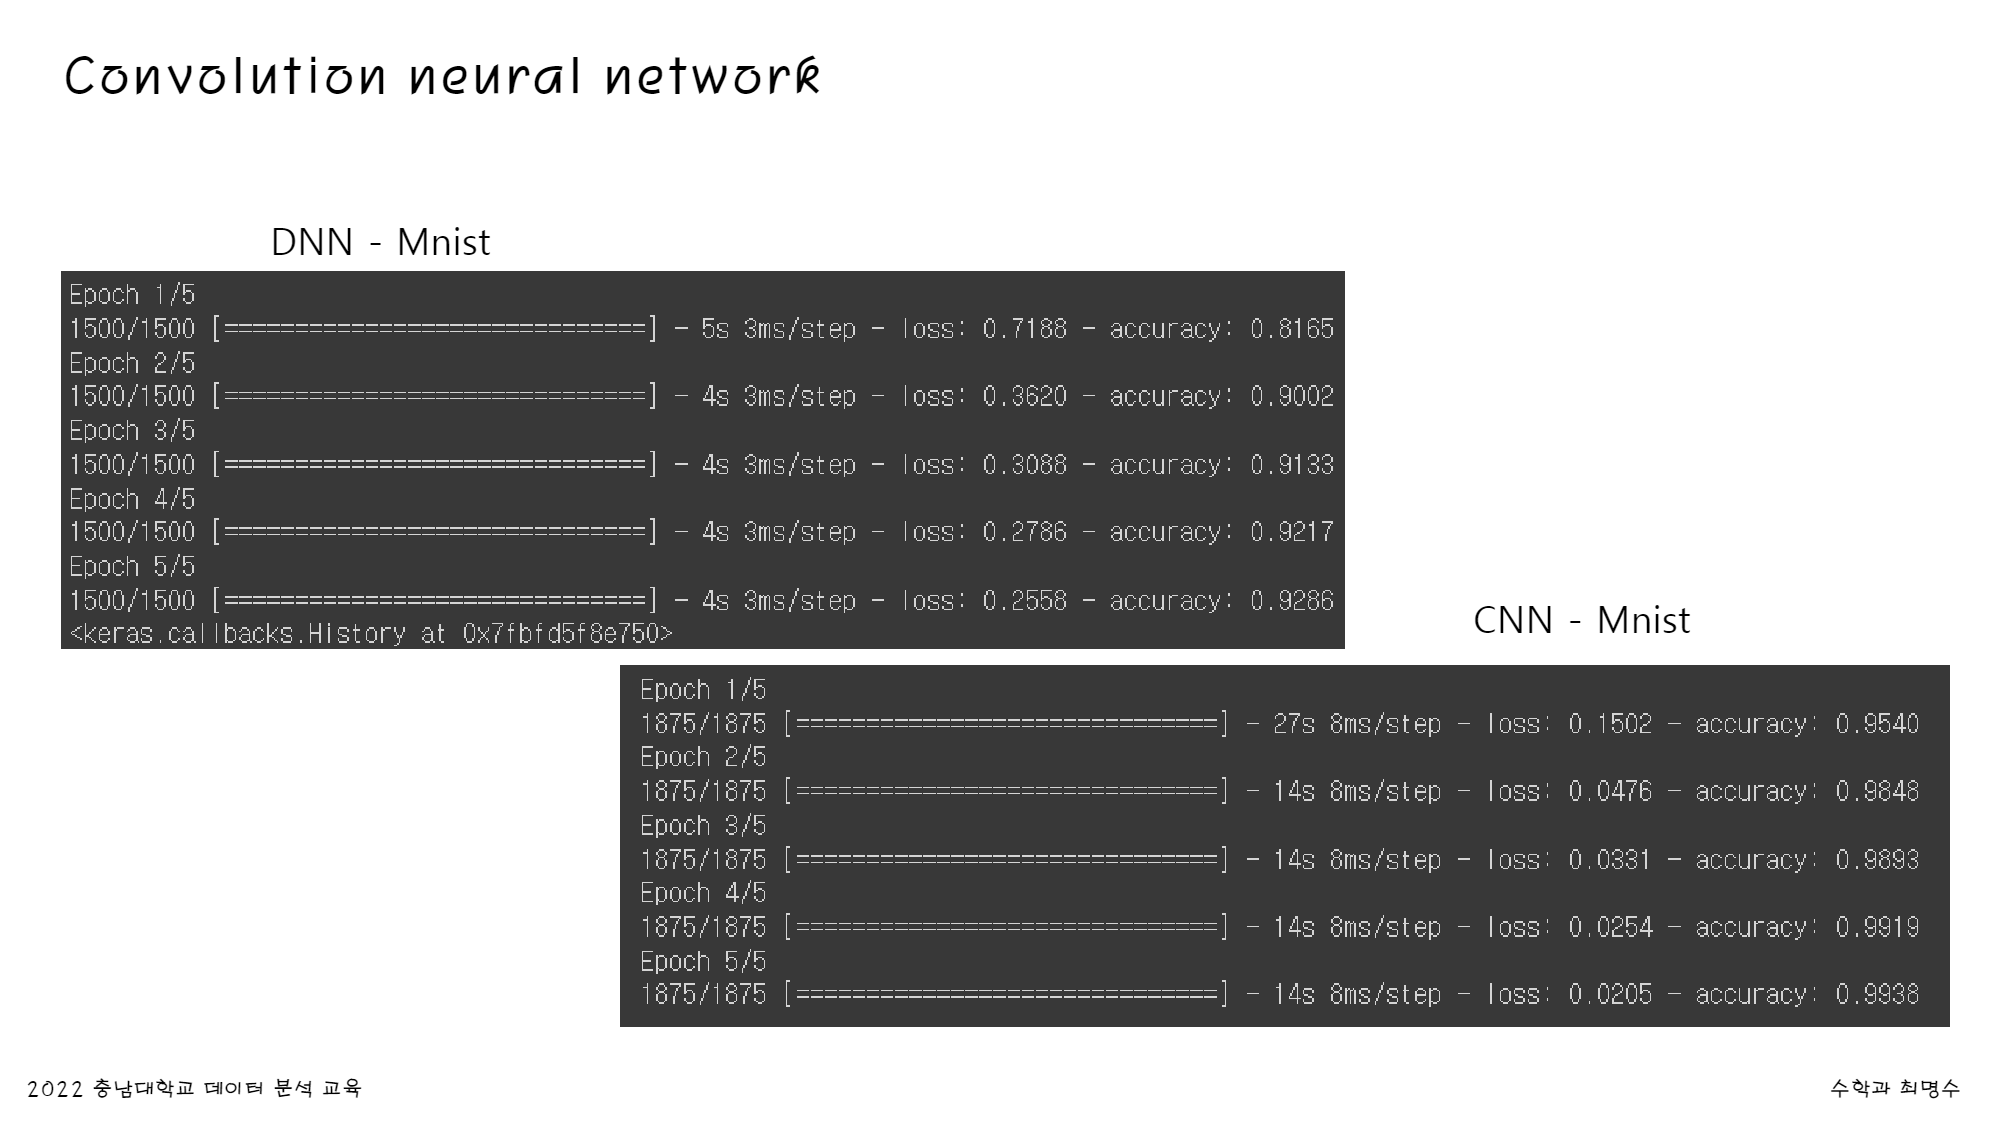

### => CNN 방법을 활용했을 때 loss가 더 작고, 정확도가 더 높다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))


In [4]:
# 0~1사이로 정규화 시키기

x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
# 모델 만들기 

# Conv2D(필터갯수, 커널크기)
# padding = 'valid' : output이 input보다 작아짐
# padding = 'same'  : output이 input과 같아짐.
                      # - 이미지 경계에 빈 영역을 추가할때 사용
                      # 입력 이미지의 경계를 학습하는데 효과적

model = models.Sequential() # sequential
model.add(layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', 
                        input_shape = (28, 28, 1))) # input data를 Flattening 하지 않는다.
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model.add(layers.Flatten()) # 플래트닝
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation ='softmax'))

**1. 컨볼루션 레이어**

- 이미지의 특징점을 찾기 위해 사용된다.
- 기본적인 컨볼루션 레이어로 Conv2d가 있다. 

**2. 풀링 레이어**

- 이미지 처리에 필요한 가중치와 연산량을 줄이기 위해 사용된다.
- 풀링 레이어에서 Max pooling, Average pooling, Min pooling 이 세가지 방식으로 대표값을 추출할 수 있다.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [7]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.1324 - accuracy: 0.9594
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0421 - accuracy: 0.9873
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0178 - accuracy: 0.9943


In [9]:
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 1s - loss: 0.0490 - accuracy: 0.9862 - 873ms/epoch - 3ms/step


[0.04901517182588577, 0.9861999750137329]

[0.9594166874885559, 0.9872666597366333, 0.9909666776657104, 0.9927833080291748, 0.9942666888237]
[0.13241618871688843, 0.04205578565597534, 0.029525527730584145, 0.022735636681318283, 0.017765473574399948]


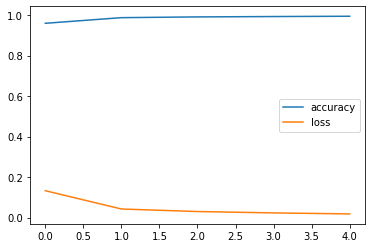

In [10]:
y_acc = history.history['accuracy']
y_loss = history.history['loss']

print(y_acc)
print(y_loss)

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_acc, label = "accuracy")
plt.plot(x_len, y_loss, label = 'loss')
plt.legend()
plt.show()

In [11]:
# 예측한 실제 결과를 살펴보자.

preds = model.predict(x_test, batch_size = 128)

y_pred = np.array([np.argmax(preds[loc]) for loc in range(len(x_test))])

79/79 [==============================] - 0s 3ms/step


In [12]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

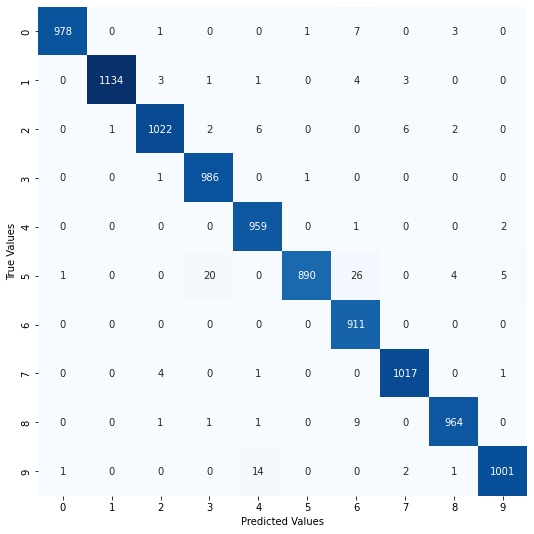

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (9,9))
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square = True, annot = True, 
            cbar = False, cmap = plt.cm.Blues, fmt = 'd')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()



In [15]:
count = 0
for k in range(len(y_test)):
  if y_pred[k] != y_test[k]:
    count += 1

accuracy = 1 - count/len(y_test)
print("총 데이터 수 : {}".format(len(y_test)))
print("잘못예측한 데이터 수 : {}".format(count))
print("정확도 : {:1.2f}%".format(accuracy))

총 데이터 수 : 10000
잘못예측한 데이터 수 : 138
정확도 : 0.99%


In [16]:
wrong = []
for k in range(len(y_test)):
  if y_pred[k] != y_test[k]:
    wrong.append(k)

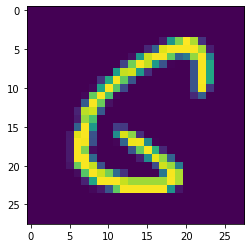

예측값 :  8
실제값 :  6




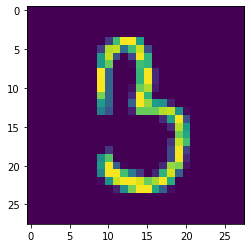

예측값 :  5
실제값 :  3




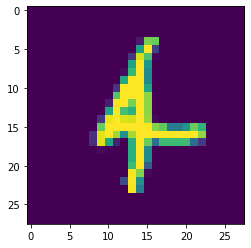

예측값 :  1
실제값 :  4




In [18]:
import random

for loc in random.sample(wrong, 3):
  plt.imshow(x_test[loc].reshape(28,28))
  plt.show()

  print("예측값 : ", y_pred[loc])
  print("실제값 : ", y_test[loc])
  print("\n")

     